# Author - Anjali Jha

## Data Science and Business Analytics Intern @The Sparks Foundation

### TASK 1 : PREDICTION USING SUPERVISED ML

## To predict the percentage of an student based on the no. of study hours.

This is a simple linear regression task to analyse what will be the predicted percentage of marks that a student is expected to  score based on the study hours of 9.25 hours/day. 

In [1]:
#importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Modules imported and using Pandas module,reading the dataset

In [2]:
df = pd.read_csv("C:/Users/anjal/Desktop/student_scores.csv")
print("Data imported successfully")

Data imported successfully


In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### incorporated the dataset

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting a 2-D graph to analyse a relationship between the number of hours studied and percentage of scores

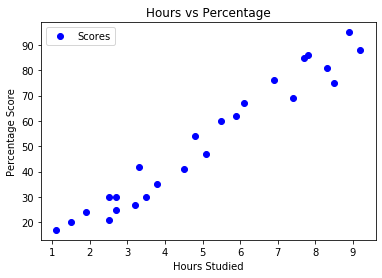

In [5]:
df.plot(x='Hours', y='Scores', style='o',c="blue",linewidth=10)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### There exist a positive linear relationship between the data, next step is to prepare the data and divide it into inputs and outputs

In [6]:
X = df.iloc[:, :-1].values ##iloc access the data and .values convert it to numpy object
y = df.iloc[:, 1].values

next step is to split the data into training and test data, using Scikit-Learn's inbuilt method

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now is the time to train the algorithm

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


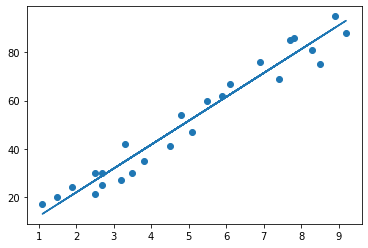

In [9]:
# Plotting the regression line using matplotlib
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

In [10]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing the actual and predicted value

In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Predicting the result for the required time

In [15]:
hours= np.array(9.25)
hours=hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Evaluating The Model

Evaluating the model to keep a check how well it performs on different dataset

In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #mean absolute error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) #mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #root mean squared error

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
